<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Постановка-задачи" data-toc-modified-id="Постановка-задачи-1">Постановка задачи</a></span></li><li><span><a href="#Как-насчет-линейной-регрессии?" data-toc-modified-id="Как-насчет-линейной-регрессии?-2">Как насчет линейной регрессии?</a></span></li><li><span><a href="#Логистическая-функция-(aka-сигмоид)" data-toc-modified-id="Логистическая-функция-(aka-сигмоид)-3">Логистическая функция (aka сигмоид)</a></span><ul class="toc-item"><li><span><a href="#Что-она-нам-дает?" data-toc-modified-id="Что-она-нам-дает?-3.1">Что она нам дает?</a></span></li><li><span><a href="#Как-подбирать-коэффициенты?" data-toc-modified-id="Как-подбирать-коэффициенты?-3.2">Как подбирать коэффициенты?</a></span></li></ul></li></ul></div>

### Постановка задачи

- Пусть мы разрабатываем социальную сеть
- Мы знаем возраст пользователя, его опыт работы, доходы, кол-во друзей
- И мы хотим спрогнозировать купит ли пользователь VIP-аккаунт

### Как насчет линейной регрессии?

Мы могли бы применить линейную регрессию, что-то вроде:  
$ОплаченныйАккунт = k1*Возраст + k2*Опыт + k3*Доходы$

Но мы получили бы число в районе (-∞, +∞).
А мы хотели бы получить число от [0, 1], которое можно было бы интерпретировать как вероятность того, купит ли пользователь аккаунт 

### Логистическая функция (aka сигмоид)

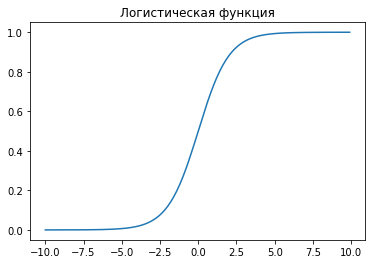

In [10]:
import math

def logistic(x: float) -> float:
    return 1.0 / (1 + math.exp(-x))

xs = [x/10 for x in range(-100, 100)]
ys = [logistic(x) for x in xs]


import matplotlib.pyplot as plt
plt.plot(xs, ys)

plt.title('Логистическая функция')
  
plt.show()

#### Что она нам дает?

- (-∞, +∞) -> (0, 1)
- Удобная производная lamda x: logistic(x) * (1 - logistic(x))

Применим ее к результату линейной регресии:

$logistic(𝑘1∗Возраст+𝑘2∗Опыт+𝑘3∗Доходы)$

#### Как подбирать коэффициенты?

Если очень грубо:
- Решаем оптимизационную задачу подбора коэффициентов k_i используя метод максимального правдоподобия - максимизируя функцию праводоподобия
- Для удобства ищем максимум логарифма функции правдободобия (это эквивалентная задача, так как логарифм - монотонно возрастающая функция)
- Для этого используем градиентный спуск